# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
df=pd.read_csv("glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


### Adding Column names to the dataset

In [3]:
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']

In [4]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.shape

(213, 11)

The dataset have 213 rows and 11 columns

In [6]:
df.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

There is no null values in dataset

In [7]:
df['Type of Glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In [8]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

We observe that all features having datatype as float (All are continous independent variable)

### Classifying glass type in terms of window and non window

In [9]:
df['Type of Glass']=df['Type of Glass'].replace([1,2,3,4],'Window Glass')
df['Type of Glass']=df['Type of Glass'].replace([5,6,7],'Non Window Glass')


In [10]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [11]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,Window Glass
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,Window Glass
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,Window Glass
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,Window Glass
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,Window Glass


In [12]:
df['Type of Glass'].value_counts()

Window Glass        162
Non Window Glass     51
Name: Type of Glass, dtype: int64

We can see that target varibale is highly imbalanced

## Now using encoder to encode the target variable

In [13]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

df['Type of Glass']=enc.fit_transform(df['Type of Glass'])

df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,0
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,0
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,0
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,0


### Describing the Dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id number,213.0,108.000000,61.631972,2.00000,55.00000,108.00000,161.00000,214.00000
RI,213.0,1.518353,0.003039,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.406761,0.818371,10.73000,12.90000,13.30000,13.83000,17.38000
Mg,213.0,2.676056,1.440453,0.00000,2.09000,3.48000,3.60000,3.98000
Al,213.0,1.446526,0.499882,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655023,0.774052,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.499108,0.653035,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.957934,1.426435,5.43000,8.24000,8.60000,9.18000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000


# EDA

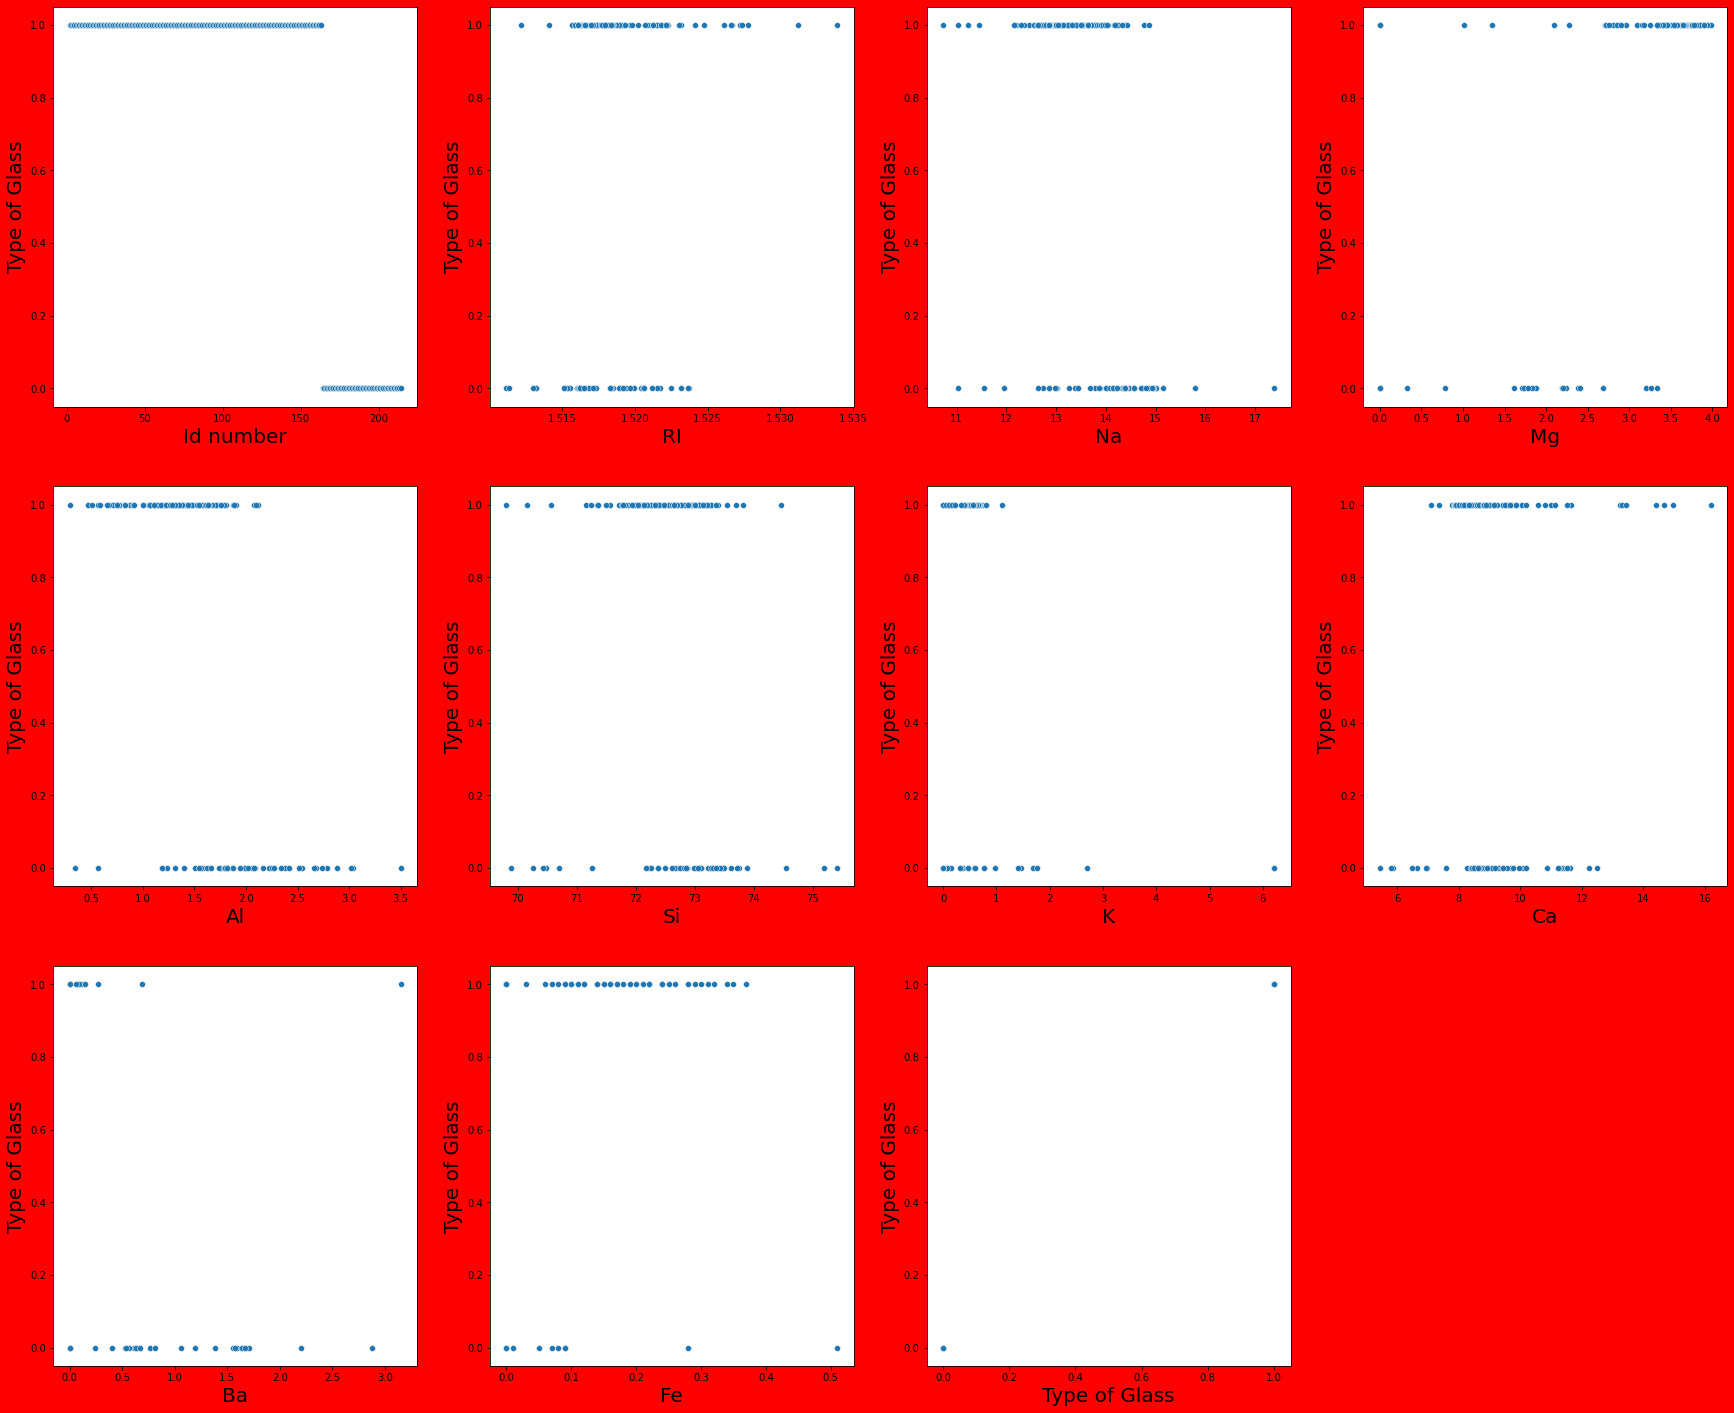

In [15]:
plt.figure(figsize=(30,25),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(x=column,y="Type of Glass",data=df)
        plt.xlabel(column,size=20)
        plt.ylabel('Type of Glass',size=20)
    plotnumber=plotnumber+1

plt.show()

# Visualisation of Trarget Variable

1    162
0     51
Name: Type of Glass, dtype: int64


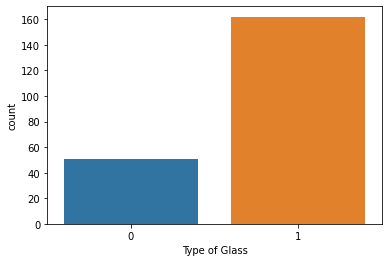

In [16]:
ax=sns.countplot(x='Type of Glass',data=df)
print(df['Type of Glass'].value_counts())

# Checking the correaltion with target variable and between features

## Plotting heatmap

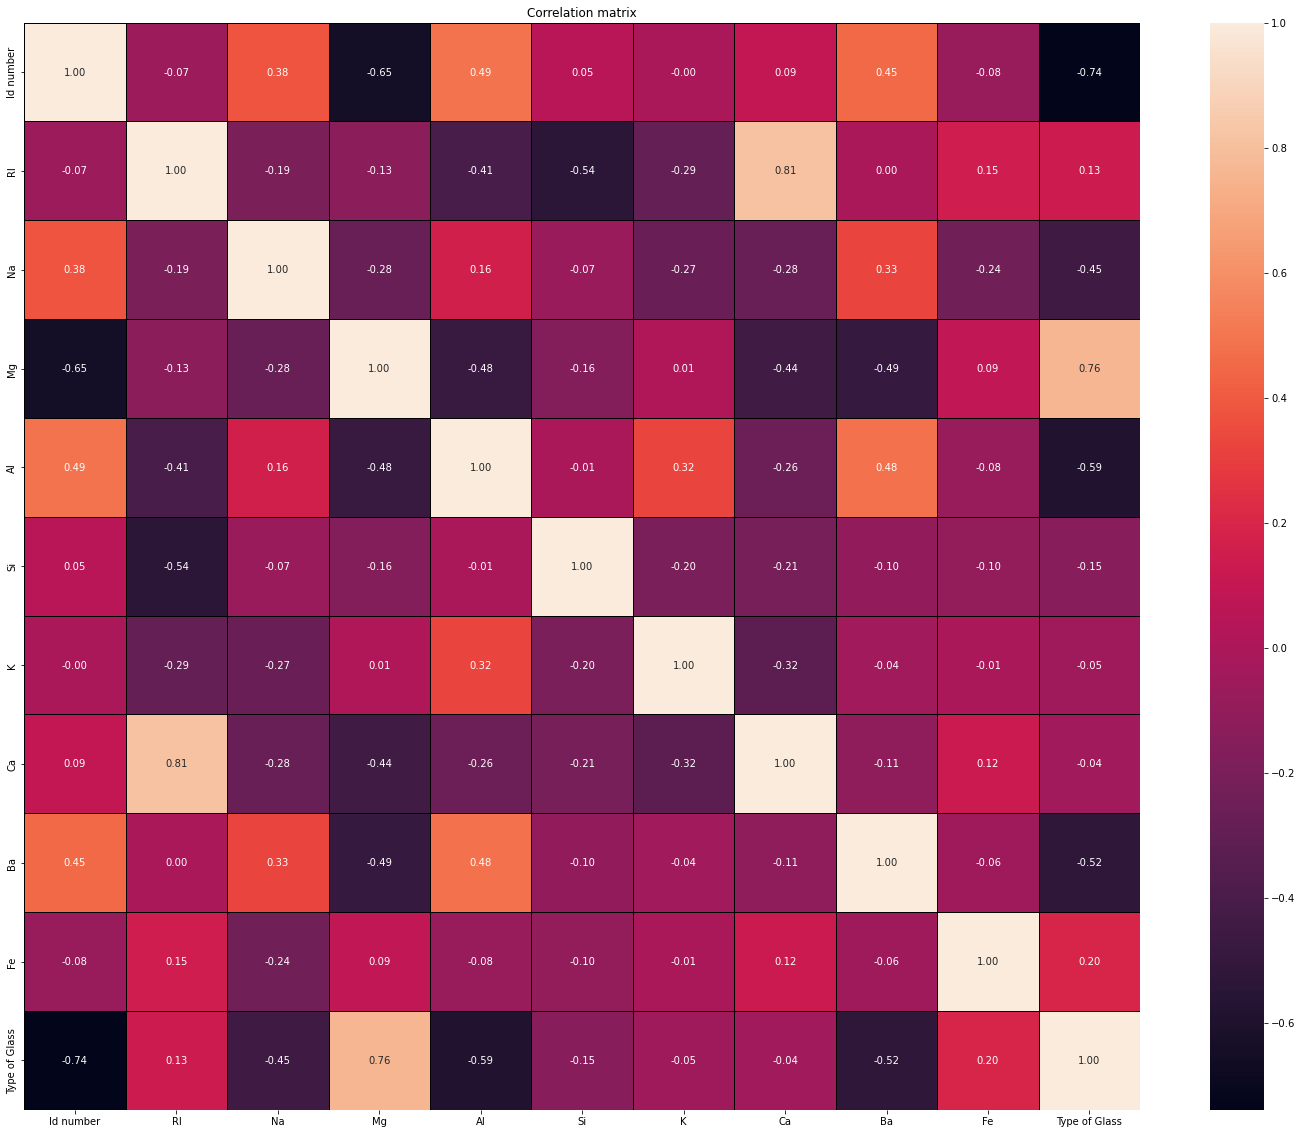

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

### It seems that RI is dependent on Ca .Lets Check using scatter plot

<AxesSubplot:xlabel='RI', ylabel='Ca'>

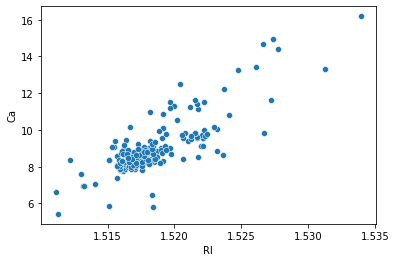

In [18]:
sns.scatterplot(x='RI',y="Ca",data=df)

In [19]:
df.corr()['Type of Glass'].sort_values(ascending=False)

Type of Glass    1.000000
Mg               0.758357
Fe               0.196747
RI               0.132368
Ca              -0.040319
K               -0.052104
Si              -0.145654
Na              -0.453504
Ba              -0.523014
Al              -0.585198
Id number       -0.739143
Name: Type of Glass, dtype: float64

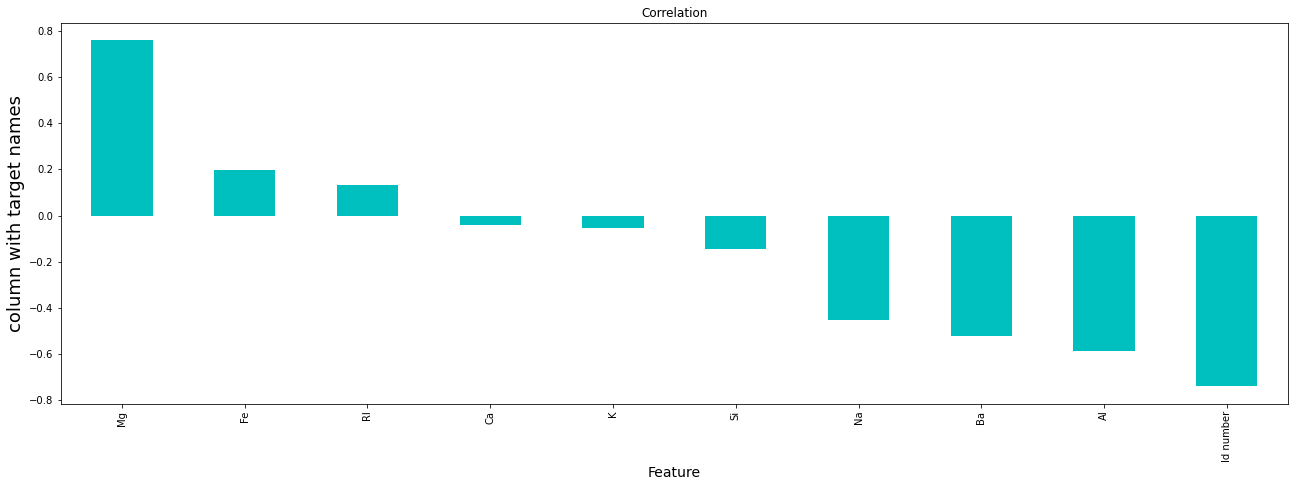

In [20]:
plt.figure(figsize=(22,7))
df.corr()['Type of Glass'].sort_values(ascending=False).drop(['Type of Glass']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()


### We can see that Mg,Fe,RI are positively realted to target variable and Ca,K,Si,Na,Ba,Al are negatvely related to target varibale

# Checking the skewness

In [21]:
df.skew().sort_values(ascending=False)

K                6.549276
Ba               3.406749
Ca               2.040591
Fe               1.747173
RI               1.639658
Al               0.900017
Na               0.457318
Id number        0.000000
Si              -0.744546
Mg              -1.154323
Type of Glass   -1.229860
dtype: float64

### Lets check skewness through graph

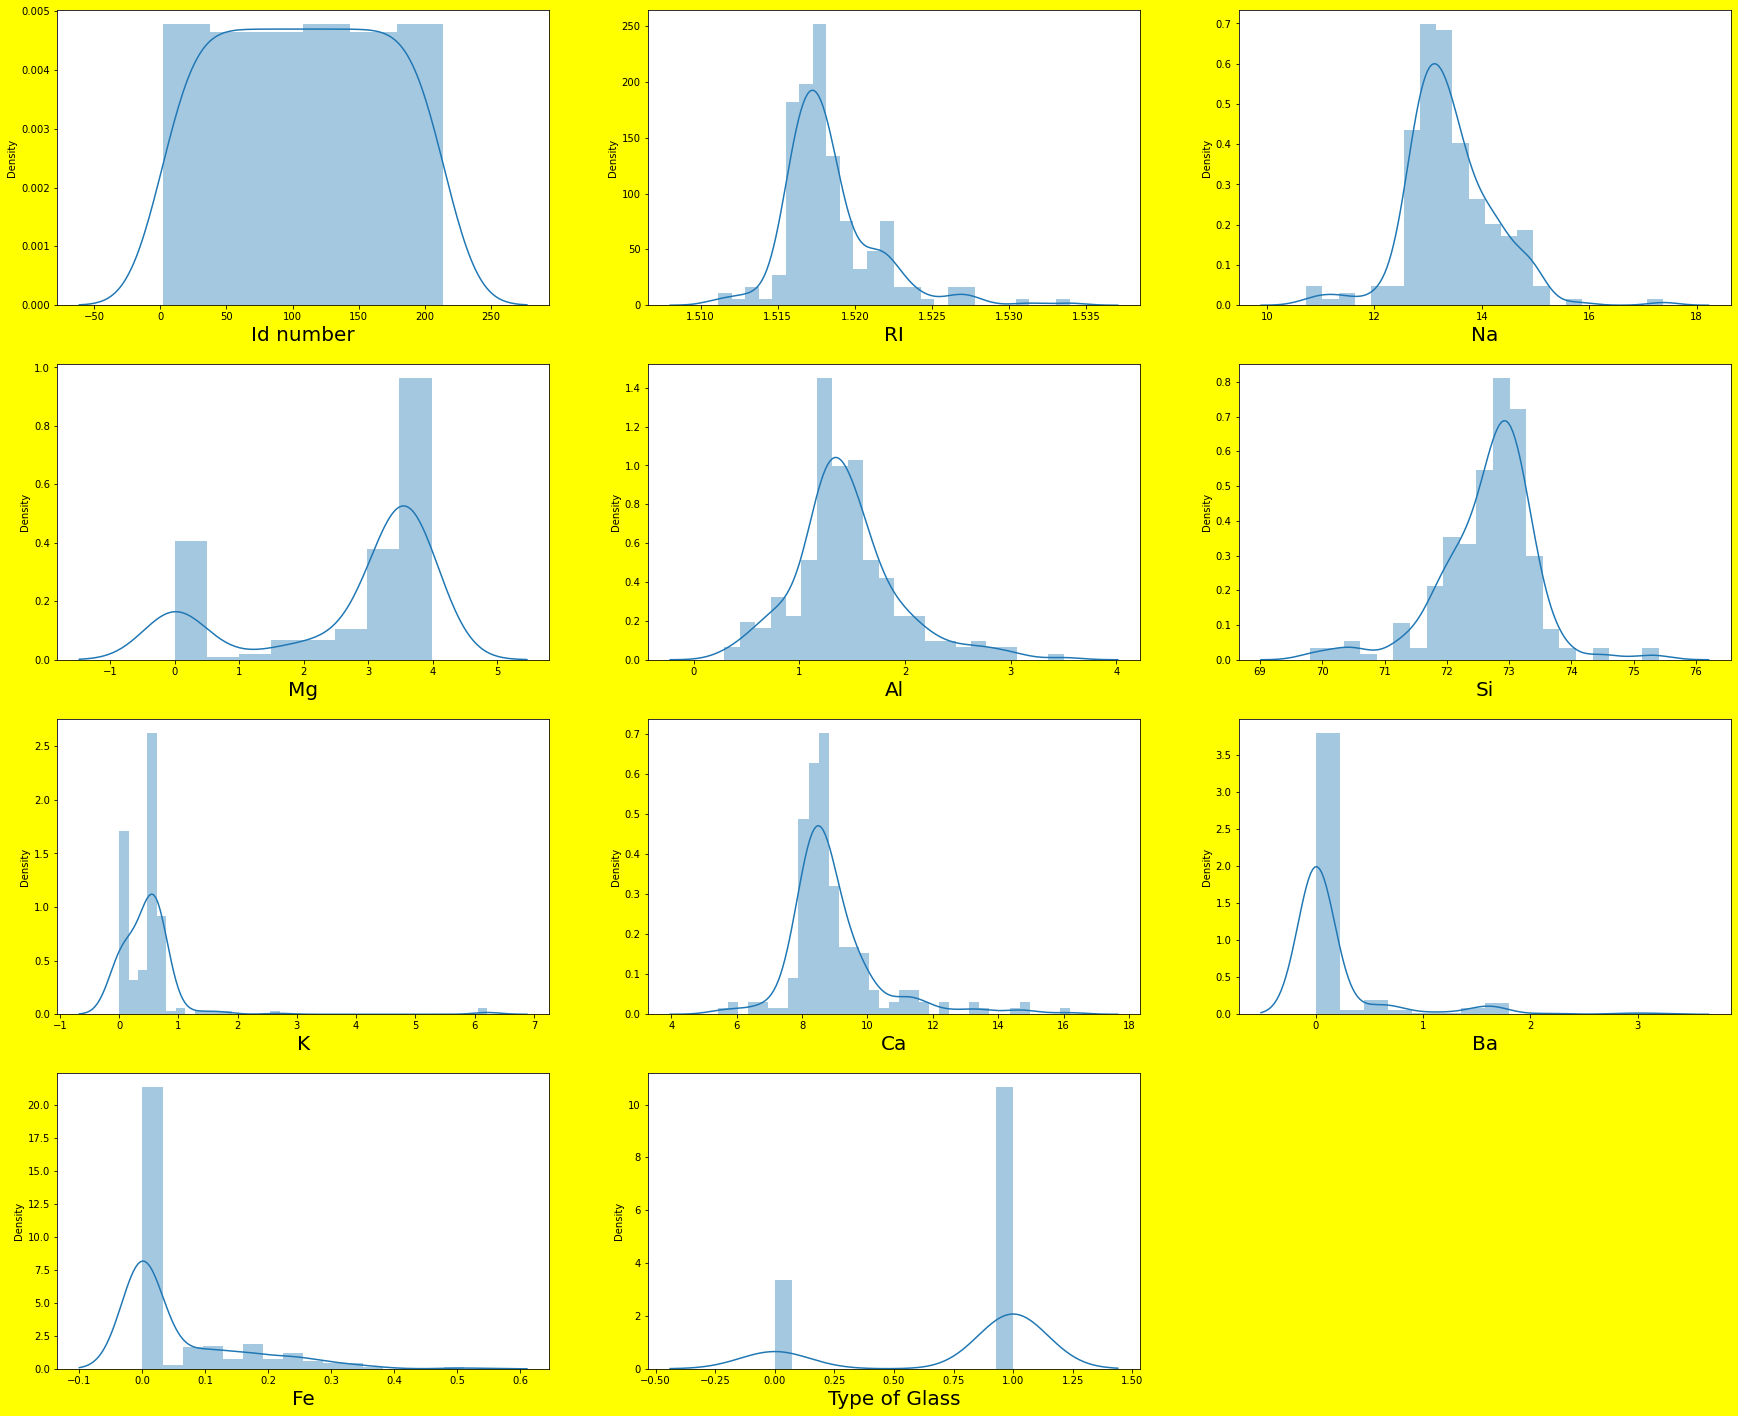

In [22]:
plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,size=(20))
    plotnumber=plotnumber+1

plt.show()

From above observation we can say that Mg,Ba,Fe are highly skewd at right.

# Checking the outliers

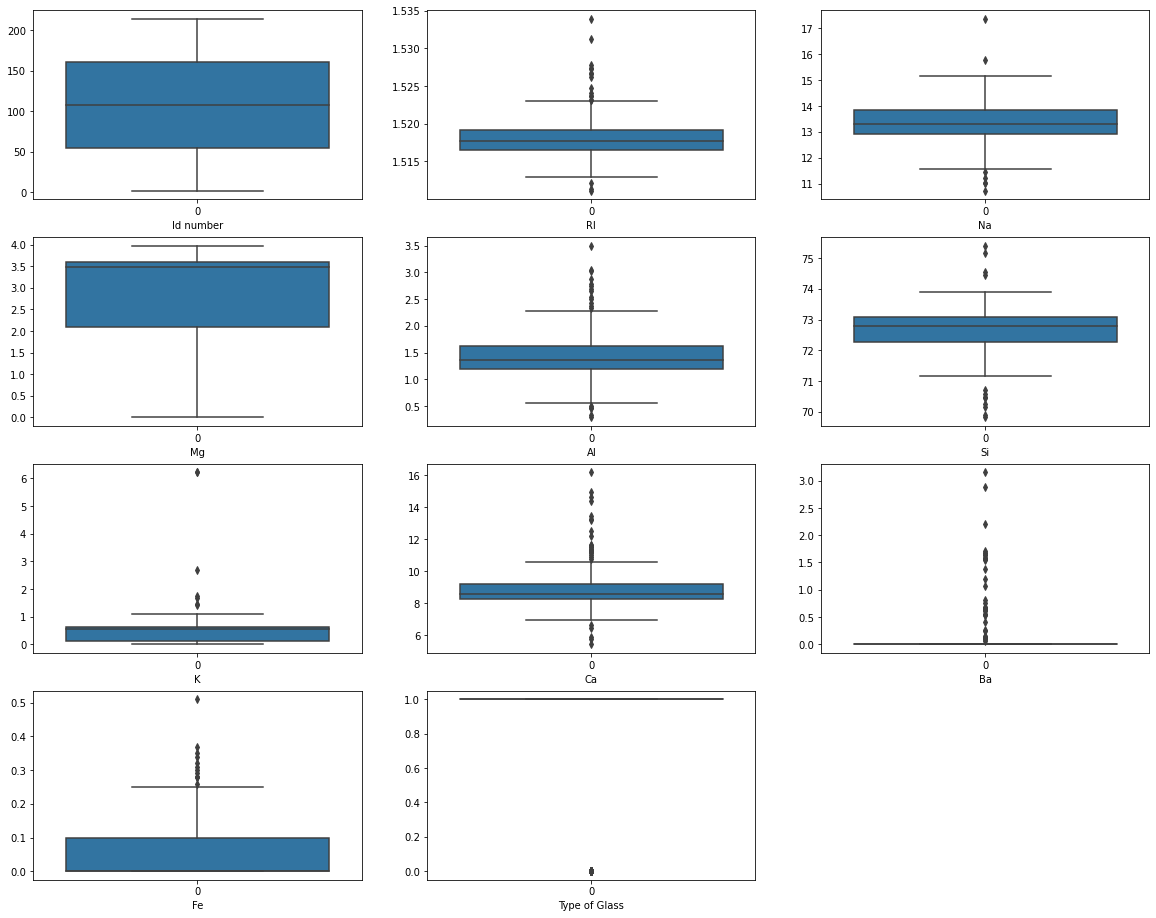

In [23]:
graph=1

plt.figure(figsize=(20,16))

for column in df:
    if graph<=11:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
    graph+=1
plt.show()

From above observation we can see that RI, Na, Mg, Al , Si ,K, Ca, Ba, Fe are having outliers

# Preprocessing

## Separating label and features as x and y

In [24]:
x=df.drop(columns=['Id number','Type of Glass','Ca'],axis=1)
y=df['Type of Glass']

## Removing Outliers using Z-technique

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape
z

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.353808,0.588301
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.353808,0.588301
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.353808,0.588301
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.353808,0.588301
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.353808,2.082200
...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,1.778672,0.588301
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,2.844912,0.588301
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,2.945501,0.588301
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,2.804676,0.588301


In [26]:
threshold=3  # rule of thumb
#index number
print(np.where(z>3))
len(np.where(z>3)[0])

(array([105, 105, 105, 105, 106, 106, 111, 144, 161, 162, 162, 162, 170,
       170, 171, 171, 173, 183, 183, 187, 188, 200, 200, 202, 206, 212],
      dtype=int64), array([0, 1, 4, 6, 0, 4, 0, 7, 7, 3, 4, 6, 3, 5, 3, 5, 7, 1, 4, 4, 6, 4,
       5, 6, 6, 6], dtype=int64))


26

We can observe that there are 26 no. of outliers present 

In [27]:
x_new=df[(z<3).all(axis=1)]
print("old dataframe",x.shape)
print("new dataframe",x_new.shape)
print("total number of rows dropped",x.shape[0]-x_new.shape[0])

old dataframe (213, 8)
new dataframe (197, 11)
total number of rows dropped 16


Total no.of rows dropped is 16

## Percentage data loss

In [28]:
loss_percent=(213-197)/213*100
loss_percent

7.511737089201878

Percentage loss is less than 10 % .So its OK

# Handling imbalanced dataset
Since target variable is imbalanced and size of dataset is small so we will do oversampling

## Over sampling using SMOTE

In [29]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=50)

In [32]:
over_smpl=SMOTE(0.75)
x_train_ns,y_train_ns=over_smpl.fit_resample(x_train,y_train)

In [33]:
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({1: 41, 0: 12})


In [34]:
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes after fitCounter({1: 41, 0: 30})


Our dataset is Balanced

# Removing skewness using data transforamtion

In [35]:
from sklearn.preprocessing import power_transform

In [36]:
x=power_transform(x,method='yeo-johnson')

In [37]:
pd.DataFrame(x).skew().sort_values()

2   -0.911150
5   -0.075233
1   -0.009526
0    0.000000
3    0.000874
4    0.133867
7    0.852473
6    1.817526
dtype: float64

We can see that skewness is removed

In [38]:
x_new=pd.DataFrame(x)
x_new

,0,1,2,3,4,5,6,7
0,-2.081668e-17,0.616990,0.681474,-0.081445,0.038252,0.268575,-0.456097,-0.682180
1,-6.245005e-17,0.184792,0.620552,0.286720,0.394607,0.011888,-0.456097,-0.682180
2,-2.081668e-17,-0.210310,0.793249,-0.232162,-0.121300,0.496129,-0.456097,-0.682180
3,-2.775558e-17,-0.135420,0.706078,-0.342629,0.521438,0.447821,-0.456097,-0.682180
4,-6.938894e-17,-0.745389,0.693759,0.442150,0.366668,0.656025,-0.456097,1.715594
...,...,...,...,...,...,...,...,...
208,-6.245005e-17,0.909819,-1.738836,2.415518,-0.121300,-1.195502,2.365582,-0.682180
209,-4.510281e-17,1.787436,-1.738836,1.104938,0.493096,-1.627123,2.371415,-0.682180
210,6.938894e-17,1.162750,-1.738836,1.155073,1.017262,-1.627123,2.371564,-0.682180
211,-5.204170e-17,1.185528,-1.738836,1.020265,1.306184,-1.627123,2.371347,-0.682180


# Data Standardisation

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x_new)

# Check for multicolliernity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x_new.columns
vif

,vif1,features
0,5.283892,0
1,2.806971,1
2,2.942385,2
3,3.489968,3
4,3.376824,4
5,2.621644,5
6,2.118615,6
7,1.069703,7


# Training our model

### Logistic Regression Classifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix



In [43]:
lr=LogisticRegression()

## Finding the best random state

In [44]:
max_acc=0
max_rs=0

for i in range(0,200):
    x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaled,y,random_state=i,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train_ns,y_train_ns)
    pred_lr=lr.predict(x_test)
    accuracy=accuracy_score(y_test,pred_lr)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.9534883720930233 random state 0
max_accuracy 0.9534883720930233 max_random_state 0
Testing accuracy 0.9534883720930233 random state 1
Testing accuracy 0.9767441860465116 random state 2
max_accuracy 0.9767441860465116 max_random_state 2
Testing accuracy 0.9534883720930233 random state 3
Testing accuracy 0.9302325581395349 random state 4
Testing accuracy 0.9767441860465116 random state 5
Testing accuracy 0.9534883720930233 random state 6
Testing accuracy 0.9767441860465116 random state 7
Testing accuracy 0.9534883720930233 random state 8
Testing accuracy 0.9534883720930233 random state 9
Testing accuracy 0.9767441860465116 random state 10
Testing accuracy 0.9302325581395349 random state 11
Testing accuracy 0.9767441860465116 random state 12
Testing accuracy 0.9534883720930233 random state 13
Testing accuracy 0.9302325581395349 random state 14
Testing accuracy 0.9302325581395349 random state 15
Testing accuracy 0.9302325581395349 random state 16
Testing accuracy 1.0 ran

We find max accuracy of 100% at random state 17

# Train Test Split

In [45]:
x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaled,y,random_state=17,test_size=0.20)


In [46]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train_ns)
        print(f"Accuracy score in training:{accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [47]:
lr=LogisticRegression()



In [48]:
lr.fit(x_train_ns,y_train_ns)





LogisticRegression()

In [49]:
metric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:95.882353%


In [50]:
metric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:100.000000%
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        34

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [51]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

## Confusion Matrix

In [52]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 9,  0],
       [ 0, 34]], dtype=int64)

## Finding best Cross validation score for logistic regression:

In [53]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 84.05484041615236

cv at  3
Cross validation score is :- 87.79342723004694

cv at  4
Cross validation score is :- 90.13801537386443

cv at  5
Cross validation score is :- 88.26135105204872

cv at  6
Cross validation score is :- 90.1984126984127

cv at  7
Cross validation score is :- 91.53609831029186

cv at  8
Cross validation score is :- 90.15313390313389

cv at  9
Cross validation score is :- 93.01529790660226



At cv=9 we got maximum validation score of 93.01

In [54]:
lssscore_selected=cross_val_score(lr,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.9301529790660226


There we found that at cv=9 and random state =17 we have testing accuracy =100% and cross_val score=93.01%

# Hyperparameter Tuning using Grid search cv

In [55]:
from sklearn.model_selection import GridSearchCV






In [56]:
param_grid={'penalty':['l1','l2','elesticnet','none'],
           'solver':['lbfgs','newton-cg','liblinear','sag'],
           'max_iter':[100,1000,2500]}


In [57]:
grid_srch=GridSearchCV(estimator=lr,param_grid=param_grid)

grid_srch.fit(x_train_ns,y_train_ns)

print('best_parameters',grid_srch.best_params_)

best_parameters {'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}


In [58]:
lr=grid_srch.best_estimator_

In [59]:
metric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:96.470588%


In [60]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:100.000000%
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        34

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



## Cross validation score

In [61]:
lssscore_selected=cross_val_score(lr,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.9160628019323672


## Conclusion(Logistic Regression)

# Using Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier



In [63]:
rf=RandomForestClassifier()

In [64]:
rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [65]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:100.000000%


In [66]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=False)


Accuracy score in testing:97.674419%
Classification report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.99        34

    accuracy                           0.98        43
   macro avg       0.95      0.99      0.97        43
weighted avg       0.98      0.98      0.98        43



In [67]:
lssscore_selected=cross_val_score(rf,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)


the cv score is  0.8828502415458936


# Confusion Matrix

In [68]:
y_pred=rf.predict(x_test)

In [69]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 9,  0],
       [ 1, 33]], dtype=int64)

## Hyperparameter Tuning

In [70]:
params={'n_estimators':[10,15],
       'criterion':['entropy','gini'],
       'max_depth':[5,25],
       'min_samples_split':[3,4,5,6,7,8]}

In [71]:
grd=GridSearchCV(estimator=rf,param_grid=params)

In [72]:
grd.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [5, 25],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [10, 15]})

In [73]:
rf=grd.best_estimator_

In [74]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:98.823529%


In [75]:
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:97.674419%
Classification report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.99        34

    accuracy                           0.98        43
   macro avg       0.95      0.99      0.97        43
weighted avg       0.98      0.98      0.98        43



In [76]:
lssscore_selected=cross_val_score(rf,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.873389694041868


## Conclusion(Random Forest Classifier)

# Using KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier


In [78]:
knn=KNeighborsClassifier()

In [79]:
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier()

In [80]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)


Accuracy score in training:94.117647%


In [81]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:95.348837%
Classification report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.97      0.97      0.97        34

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



In [82]:
lssscore_selected=cross_val_score(knn,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8880837359098229


# Confusion Matrix

In [83]:
y_pred=knn.predict(x_test)


In [84]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 8,  1],
       [ 1, 33]], dtype=int64)

## Hyperparameter Tuning

In [85]:
params={'algorithm':['kd_tree','brute'],
       'leaf_size':[3,5,6,7,8,9,10],
       'n_neighbors':[3,5,7,9,11,13,15]}

In [86]:
grd=GridSearchCV(estimator=knn,param_grid=params)


In [87]:
grd.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 9, 10],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15]})

In [88]:
knn=grd.best_estimator_

In [89]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:94.117647%


In [90]:
metric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)


Accuracy score in testing:97.674419%
Classification report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.97      1.00      0.99        34

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43



In [91]:
lssscore_selected=cross_val_score(knn,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8927133655394525


## Conclusion(KNN)

# Using X-Gradient Boosting

In [92]:
import xgboost as xgb

In [93]:
xgb=xgb.XGBClassifier()

In [94]:
xgb.fit(x_train_ns,y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
metric_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:100.000000%


In [96]:
metric_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)

Accuracy score in testing:97.674419%
Classification report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.97      1.00      0.99        34

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43



## Cross Val Score

In [97]:
lssscore_selected=cross_val_score(xgb,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8921095008051529


# Confusion Matrix

In [98]:
y_pred=xgb.predict(x_test)


In [99]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 8,  1],
       [ 0, 34]], dtype=int64)

### Hyperparameter Tuning

In [100]:
params={'random_state':[1,100],
       'max_depth':[3,5,6,7,8,9,10],
       'max_leaves':[3,5,7,9,11,13,15],
       'n_estimators':[10,20]}

In [101]:
grd=GridSearchCV(estimator=xgb,param_grid=params)


In [102]:
grd.fit(x_train_ns,y_train_ns)


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'max_depth': [3, 5, 6, 7, 8, 9, 10],
                         'max_leaves': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [10, 20], 'random_state': [1, 100]})

In [103]:
xgb=grd.best_estimator_

In [104]:
metric_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)

Accuracy score in training:98.235294%


In [105]:
metric_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)


Accuracy score in testing:93.023256%
Classification report
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.97      0.94      0.96        34

    accuracy                           0.93        43
   macro avg       0.88      0.92      0.90        43
weighted avg       0.93      0.93      0.93        43



In [106]:
lssscore_selected=cross_val_score(xgb,x_scaled,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8826489533011271


# Conclusion(XG Boost)

# Plotting auc for all models

In [107]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'Recieving operating characterstics')

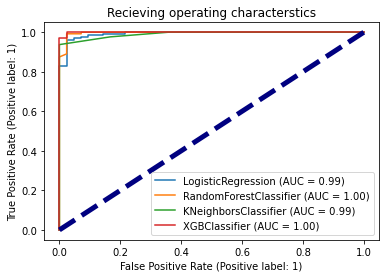

In [108]:
disp=plot_roc_curve(lr,x_train_ns,y_train_ns)
plot_roc_curve(rf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


# Final Conclusion

### We conclude that Random Forest Classifier is having max auc_score:1 among all the models and training accuracy=98.82 and testing accuracy:97.67 and cvscore:89.71

# Saving the best model

In [109]:
import pickle

pickle.dump(rf,open('classifmodel_glass','wb'))